In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

In [2]:
%pwd

'/Users/appobs/Desktop/hw/478/week2'

In [3]:
bank_df = pd.read_csv('/Users/appobs/Desktop/hw/478/week2/HW1/bank_data.csv', delimiter = ',', sep='\t')
bank_df

id  age    income  children  gender      region married  car  \
0    ID12101   48  17546.00         1  FEMALE  INNER_CITY      NO   NO   
1    ID12102   40  30085.10         3    MALE        TOWN     YES  YES   
2    ID12103   51  16575.40         0  FEMALE  INNER_CITY     YES  YES   
3    ID12104   23  20375.40         3  FEMALE        TOWN     YES   NO   
4    ID12105   57  50576.30         0  FEMALE       RURAL     YES   NO   
5    ID12106   57  37869.60         2  FEMALE        TOWN     YES   NO   
6    ID12107   22   8877.07         0    MALE       RURAL      NO   NO   
7    ID12108   58  24946.60         0    MALE        TOWN     YES  YES   
8    ID12109   37  25304.30         2  FEMALE    SUBURBAN     YES  YES   
9    ID12110   54  24212.10         2    MALE        TOWN     YES  YES   
10   ID12111   66  59803.90         0  FEMALE        TOWN     YES   NO   
11   ID12112   52  26658.80         0  FEMALE  INNER_CITY      NO  YES   
12   ID12113   44  15735.80         1  FEMALE        TOWN     YES   NO   
13   ID12114   66  55204.70         1  FEMALE        TOWN     YES  YES   
14   ID12115   36  19474.60         0    MALE       RURAL     YES   NO   
15   ID12116   38  22342.10         0  FEMALE  INNER_CITY     YES  YES   
16   ID12117   37  17729.80         2  FEMALE        TOWN     YES   NO   
17   ID12118   46  41016.00         0  FEMALE    SUBURBAN     YES   NO   
18   ID12119   62  26909.20         0  FEMALE  INNER_CITY     YES   NO   
19   ID12120   31  22522.80         0    MALE        TOWN     YES  YES   
20   ID12121   61  57880.70         2    MALE  INNER_CITY     YES   NO   
21   ID12122   50  16497.30         2    MALE        TOWN     YES   NO   
22   ID12123   54  38446.60         0    MALE  INNER_CITY     YES   NO   
23   ID12124   27  15538.80         0  FEMALE        TOWN      NO  YES   
24   ID12125   22  12640.30         2    MALE  INNER_CITY      NO  YES   
25   ID12126   56  41034.00         0    MALE  INNER_CITY     YES  YES   
26   ID12127   45  20809.70         0    MALE  INNER_CITY     YES   NO   
27   ID12128   39  20114.00         1  FEMALE        TOWN     YES   NO   
28   ID12129   39  29359.10         3  FEMALE  INNER_CITY      NO  YES   
29   ID12130   61  24270.10         1    MALE       RURAL     YES   NO   
..       ...  ...       ...       ...     ...         ...     ...  ...   
570  ID12671   49  33665.50         3  FEMALE       RURAL      NO  YES   
571  ID12672   40  36166.20         0    MALE  INNER_CITY     YES   NO   
572  ID12673   33  27712.90         2  FEMALE    SUBURBAN      NO   NO   
573  ID12674   39  22400.70         2    MALE        TOWN     YES  YES   
574  ID12675   43  28469.90         0  FEMALE  INNER_CITY     YES  YES   
575  ID12676   37  30488.00         0    MALE        TOWN     YES   NO   
576  ID12677   24  19160.30         1  FEMALE        TOWN     YES  YES   
577  ID12678   62  45342.50         0    MALE        TOWN     YES  YES   
578  ID12679   18   6294.21         0    MALE  INNER_CITY      NO   NO   
579  ID12680   47  25127.70         0  FEMALE        TOWN     YES  YES   
580  ID12681   63  51879.30         2    MALE    SUBURBAN     YES  YES   
581  ID12682   20  12644.90         2    MALE        TOWN     YES  YES   
582  ID12683   46  21984.40         3  FEMALE        TOWN      NO   NO   
583  ID12684   47  29093.10         2  FEMALE       RURAL      NO  YES   
584  ID12685   33  23528.40         1    MALE        TOWN     YES   NO   
585  ID12686   20   9516.91         3    MALE        TOWN      NO  YES   
586  ID12687   20  18364.90         1    MALE  INNER_CITY     YES   NO   
587  ID12688   43  31273.80         1  FEMALE        TOWN      NO  YES   
588  ID12689   58  49673.60         0    MALE       RURAL     YES   NO   
589  ID12690   29  12623.40         1    MALE    SUBURBAN     YES  YES   
590  ID12691   25  23818.60         0    MALE  INNER_CITY     YES   NO   
591  ID12692   40  31473.90         2  FEMALE  INNER_CITY      NO   NO   
592  ID12693  

In [4]:
bank_df.head(5)

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

In [5]:
bank_df.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [6]:
bank_df.values

array([['ID12101', 48, 17546.0, ..., 'NO', 'NO', 'YES'],
       ['ID12102', 40, 30085.1, ..., 'YES', 'YES', 'NO'],
       ['ID12103', 51, 16575.4, ..., 'YES', 'NO', 'NO'],
       ...,
       ['ID12698', 31, 15976.3, ..., 'NO', 'NO', 'YES'],
       ['ID12699', 29, 14711.8, ..., 'NO', 'YES', 'NO'],
       ['ID12700', 38, 26671.6, ..., 'YES', 'YES', 'YES']], dtype=object)

In [7]:
bank_df.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [8]:
bank_df.describe(include="all")

id         age        income    children  gender      region  \
count       600  600.000000    600.000000  600.000000     600         600   
unique      600         NaN           NaN         NaN       2           4   
top     ID12101         NaN           NaN         NaN  FEMALE  INNER_CITY   
freq          1         NaN           NaN         NaN     300         269   
mean        NaN   42.395000  27524.031217    1.011667     NaN         NaN   
std         NaN   14.424947  12899.468246    1.056752     NaN         NaN   
min         NaN   18.000000   5014.210000    0.000000     NaN         NaN   
25%         NaN   30.000000  17264.500000    0.000000     NaN         NaN   
50%         NaN   42.000000  24925.300000    1.000000     NaN         NaN   
75%         NaN   55.250000  36172.675000    2.000000     NaN         NaN   
max         NaN   67.000000  63130.100000    3.000000     NaN         NaN   

       married  car savings_acct current_acct mortgage  pep  
count      600  600          600          600      600  600  
unique       2    2            2            2        2    2  
top        YES   NO          YES          YES       NO   NO  
freq       396  304          414          455      391  326  
mean       NaN  NaN          NaN          NaN      NaN  NaN  
std        NaN  NaN          NaN          NaN      NaN  NaN  
min        NaN  NaN          NaN          NaN      NaN  NaN  
25%        NaN  NaN          NaN          NaN      NaN  NaN  
50%        NaN  NaN          NaN          NaN      NaN  NaN  
75%        NaN  NaN          NaN          NaN      NaN  NaN  
max        NaN  NaN          NaN          NaN      NaN  NaN

In [9]:
bank_df.boxplot(column=["age"], return_type='axes')

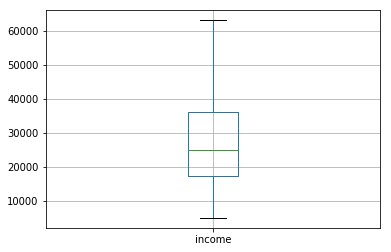

In [10]:
bank_df.boxplot(column=["income"], return_type='axes')

In [11]:
bank_df.boxplot(column=["children"], return_type='axes')

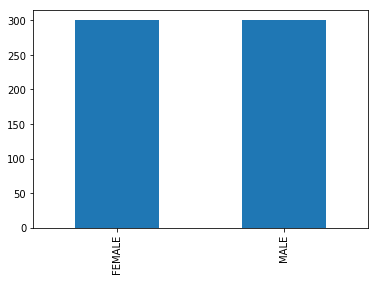

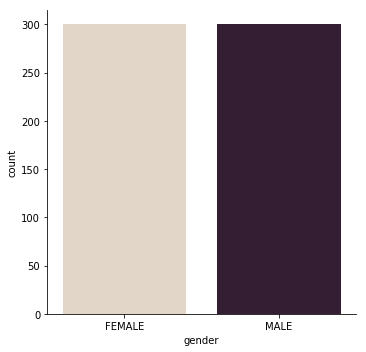

In [12]:
bank_df["gender"].value_counts().plot(kind='bar')
sns.catplot(x="gender", kind="count", palette="ch:.25", data=bank_df);

In [13]:
bank_df["married"].value_counts().plot(kind='bar')
sns.catplot(x="married", kind="count", palette="ch:.25", data=bank_df);

In [14]:
bank_df["car"].value_counts().plot(kind='bar')
sns.catplot(x="car", kind="count", palette="ch:.25", data=bank_df);

In [15]:
bank_df["savings_acct"].value_counts().plot(kind='bar')
sns.catplot(x="savings_acct", kind="count", palette="ch:.25", data=bank_df);


In [16]:
bank_df["current_acct"].value_counts().plot(kind='bar')
sns.catplot(x="current_acct", kind="count", palette="ch:.25", data=bank_df);

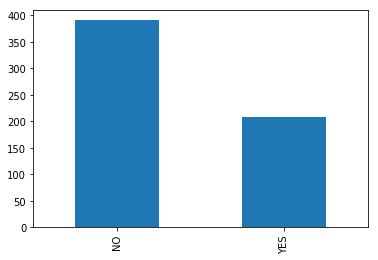

In [17]:
bank_df["mortgage"].value_counts().plot(kind='bar')
sns.catplot(x="mortgage", kind="count", palette="ch:.25", data=bank_df);


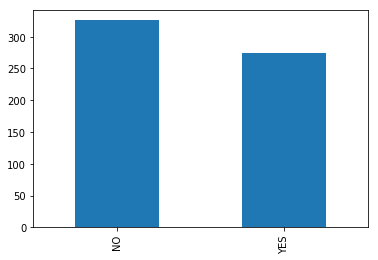

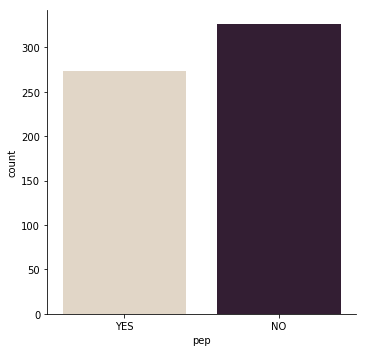

In [18]:
bank_df["pep"].value_counts().plot(kind='bar')
sns.catplot(x="pep", kind="count", palette="ch:.25", data=bank_df);


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d9095f8>,
      dtype=object)

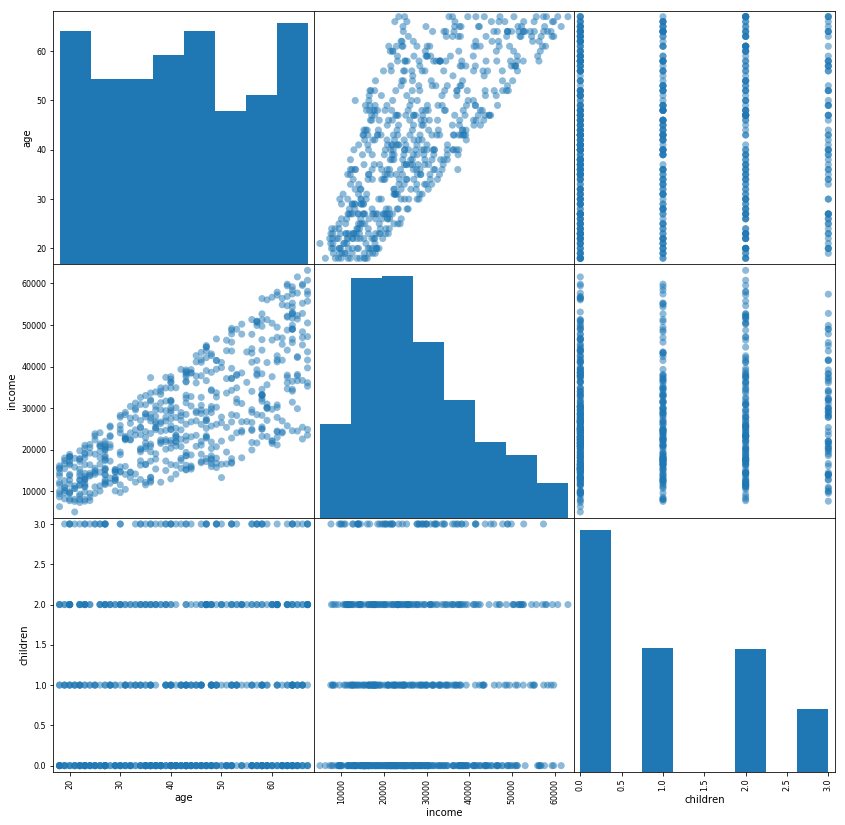

In [19]:
scatter_matrix(bank_df[['pep',"age","income","children","gender","region","married","car","savings_acct","current_acct","mortgage"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

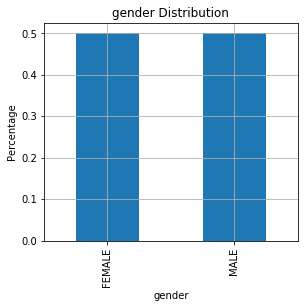

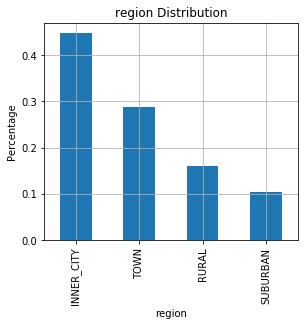

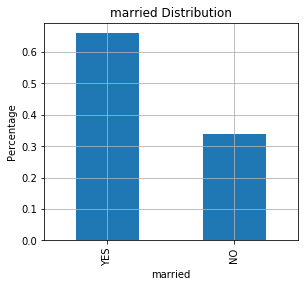

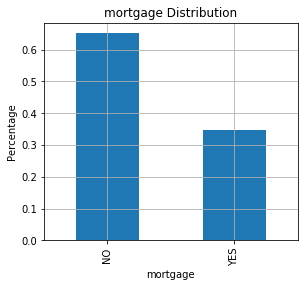

In [20]:
temp1 = bank_df["gender"].value_counts()/bank_df["gender"].count()
temp2 = bank_df["region"].value_counts()/bank_df["region"].count()
temp3 = bank_df["married"].value_counts()/bank_df["married"].count()
temp4 = bank_df["car"].value_counts()/bank_df["car"].count()
temp5 = bank_df["savings_acct"].value_counts()/bank_df["savings_acct"].count()
temp6 = bank_df["current_acct"].value_counts()/bank_df["current_acct"].count()
temp7 = bank_df["mortgage"].value_counts()/bank_df["mortgage"].count()
temp8 = bank_df["pep"].value_counts()/bank_df["pep"].count()


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('gender')
ax1.set_ylabel('Percentage')
ax1.set_title("gender Distribution")
temp1.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('region')
ax1.set_ylabel('Percentage')
ax1.set_title("region Distribution")
temp2.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('married')
ax1.set_ylabel('Percentage')
ax1.set_title("married Distribution")
temp3.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('car')
ax1.set_ylabel('Percentage')
ax1.set_title("car Distribution")
temp4.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('savings_acct')
ax1.set_ylabel('Percentage')
ax1.set_title("savings_acct Distribution")
temp5.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('current_acct')
ax1.set_ylabel('Percentage')
ax1.set_title("current_acct Distribution")
temp6.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('mortgage')
ax1.set_ylabel('Percentage')
ax1.set_title("mortgage Distribution")
temp7.plot(kind='bar', grid = True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('pep')
ax1.set_ylabel('Percentage')
ax1.set_title("pep Distribution")
temp8.plot(kind='bar', grid = True)

In [21]:
bank_df.groupby('pep').describe()

age                                                     income  \
     count       mean        std   min   25%   50%   75%   max  count   
pep                                                                     
NO   326.0  40.098160  14.123506  18.0  27.0  40.0  51.0  67.0  326.0   
YES  274.0  45.127737  14.327991  18.0  34.0  45.0  58.0  67.0  274.0   

                   ...                    children                           \
             mean  ...       75%      max    count      mean       std  min   
pep                ...                                                        
NO   24900.953374  ...  31210.90  61554.6    326.0  1.067485  1.195524  0.0   
YES  30644.919453  ...  38458.35  63130.1    274.0  0.945255  0.860571  0.0   

                         
     25%  50%  75%  max  
pep                      
NO   0.0  0.0  2.0  3.0  
YES  0.0  1.0  1.0  3.0  

[2 rows x 24 columns]

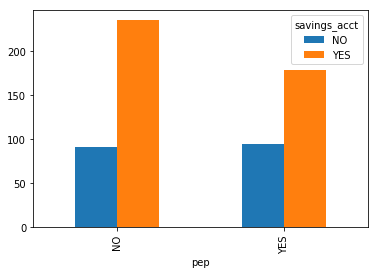

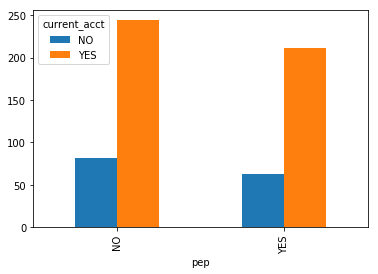

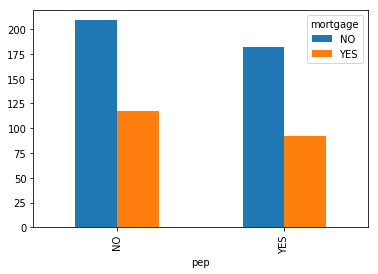

In [22]:
gg1 = pd.crosstab(bank_df["pep"], bank_df["children"])
gg2 = pd.crosstab(bank_df["pep"], bank_df["gender"])
gg3 = pd.crosstab(bank_df["pep"], bank_df["region"])
gg4 = pd.crosstab(bank_df["pep"], bank_df["married"])
gg5 = pd.crosstab(bank_df["pep"], bank_df["car"])
gg6 = pd.crosstab(bank_df["pep"], bank_df["savings_acct"])
gg7 = pd.crosstab(bank_df["pep"], bank_df["current_acct"])
gg8 = pd.crosstab(bank_df["pep"], bank_df["mortgage"])


plt.show(gg1.plot(kind = 'bar'))
plt.show(gg2.plot(kind = 'bar'))
plt.show(gg3.plot(kind = 'bar'))
plt.show(gg4.plot(kind = 'bar'))
plt.show(gg5.plot(kind = 'bar'))
plt.show(gg6.plot(kind = 'bar'))
plt.show(gg7.plot(kind = 'bar'))
plt.show(gg8.plot(kind = 'bar'))


KeyError: "None of [Index(['INNER_CITY', 'TOWN', 'INNER_CITY', 'TOWN', 'RURAL', 'TOWN', 'RURAL',\n       'TOWN', 'SUBURBAN', 'TOWN',\n       ...\n       'INNER_CITY', 'INNER_CITY', 'TOWN', 'SUBURBAN', 'RURAL', 'INNER_CITY',\n       'INNER_CITY', 'TOWN', 'INNER_CITY', 'TOWN'],\n      dtype='object', length=600)] are in the [columns]"

In [ ]:
bank_df.plot(x="income", y="age", kind="scatter")

In [ ]:
plt.hist(bank_df["age"], bins=15, alpha=0.5)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Histogram of age')
plt.grid(True)

In [ ]:
plt.hist(bank_df["income"], bins=9, alpha=0.5)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Histogram of income')
plt.grid(True)

In [ ]:
income_norm = (bank_df["income"] - bank_df["income"].mean()) / bank_df["income"].std()
income_norm.head(5)

In [ ]:
inc_bins = pd.qcut(bank_df.age, 3)
inc_bins.head(10)

In [ ]:
inc_bins = pd.qcut(bank_df.age, [0, 0.33, 0.66, 1], labels = ['young', 'mid-age', 'old'])
#bank_df["age"].value_counts().plot(kind='bar')

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

#bank_df['income', 'age', 'children'].values.reshape(-1, 1)
#bank_df['income'].values.reshape(-1, 1)
inc_mms = min_max_scaler.fit_transform(bank_df['income'].values.reshape(-1, 1))
bank_df['age'] = age_mms = min_max_scaler.fit_transform(bank_df['age'].values.reshape(-1, 1))
bank_df['children'] = chi_mms = min_max_scaler.fit_transform(bank_df['children'].values.reshape(-1, 1))
bank_df['income'] = min_max_scaler.fit_transform(bank_df['income'].values.reshape(-1, 1))
bank_df.describe()

In [ ]:
bank_dmy = pd.get_dummies(bank_df[['gender','region','married','car','savings_acct','current_acct','mortgage','pep']])
bank_dmy.head()

In [ ]:
bank_numeric = pd.concat([bank_df, bank_dmy], axis=1)
bank_numeric

In [ ]:
bank_numeric.to_csv("/Users/appobs/Desktop/hw/478/week2/bank_numeric.csv", float_format="%1.2f")

In [ ]:
corr = bank_numeric.corr()
corr

In [ ]:
# Filter out all non-high correlated variables which corr < 0.7
# False meaning highly correlated with each other
fil_out = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() >= 0.7).any()
fil_out

In [ ]:
indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

In [ ]:
# Another apporach of correlation matrix
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})